In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import os
import time
import sys
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [3]:
# x = (x-u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

for _ in range(20):
    model.add(keras.layers.Dense(100, activation='selu'))
model.add(keras.layers.Dense(10, activation='softmax'))


# reason for sparse: y is index use sparse, y is one_hot vector use categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',
             optimiser='sgd',
             metrics=['accuracy'])

In [5]:
# TensorBoard, earlystopping, ModelCheckpoint
logdir = './dnn-bn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]


history = model.fit(x_train_scaled, y_train, epochs=10,
                   validation_data=(x_valid, y_valid),
                   callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 22s 399us/sample - loss: 0.8869 - accuracy: 0.6847 - val_loss: 44.3580 - val_accuracy: 0.4058
Epoch 2/10
55000/55000 [==============================] - 16s 295us/sample - loss: 0.5869 - accuracy: 0.8052 - val_loss: 46.8677 - val_accuracy: 0.4918
Epoch 3/10
55000/55000 [==============================] - 16s 288us/sample - loss: 0.5304 - accuracy: 0.8294 - val_loss: 69.9245 - val_accuracy: 0.5760
Epoch 4/10
55000/55000 [==============================] - 19s 345us/sample - loss: 0.4986 - accuracy: 0.8383 - val_loss: 23.0865 - val_accuracy: 0.6812
Epoch 5/10
55000/55000 [==============================] - 17s 316us/sample - loss: 0.4765 - accuracy: 0.8463 - val_loss: 39.4407 - val_accuracy: 0.6182
Epoch 6/10
55000/55000 [==============================] - 15s 280us/sample - loss: 1.2822 - accuracy: 0.8467 - val_loss: 136.9905 - val_accuracy: 0.4860
Epoch 7/10
55000/55000 [==============

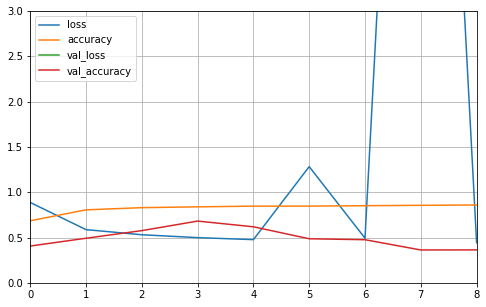

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

In [7]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.47372554030418396, 0.845]